# House Price Prediction
Using this model by just providing the data regarding the housing locality, basic amenities, furnishing, and various
other details model can predict the price of the house.

#### The dataset was taken from the UCI repository

In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Importing the necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


In [3]:
housing=pd.read_csv("Housing.csv")
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
housing.shape

(545, 13)

# Data Visualisation
Plotting graphs between each predictor variable with the Price to see its affect

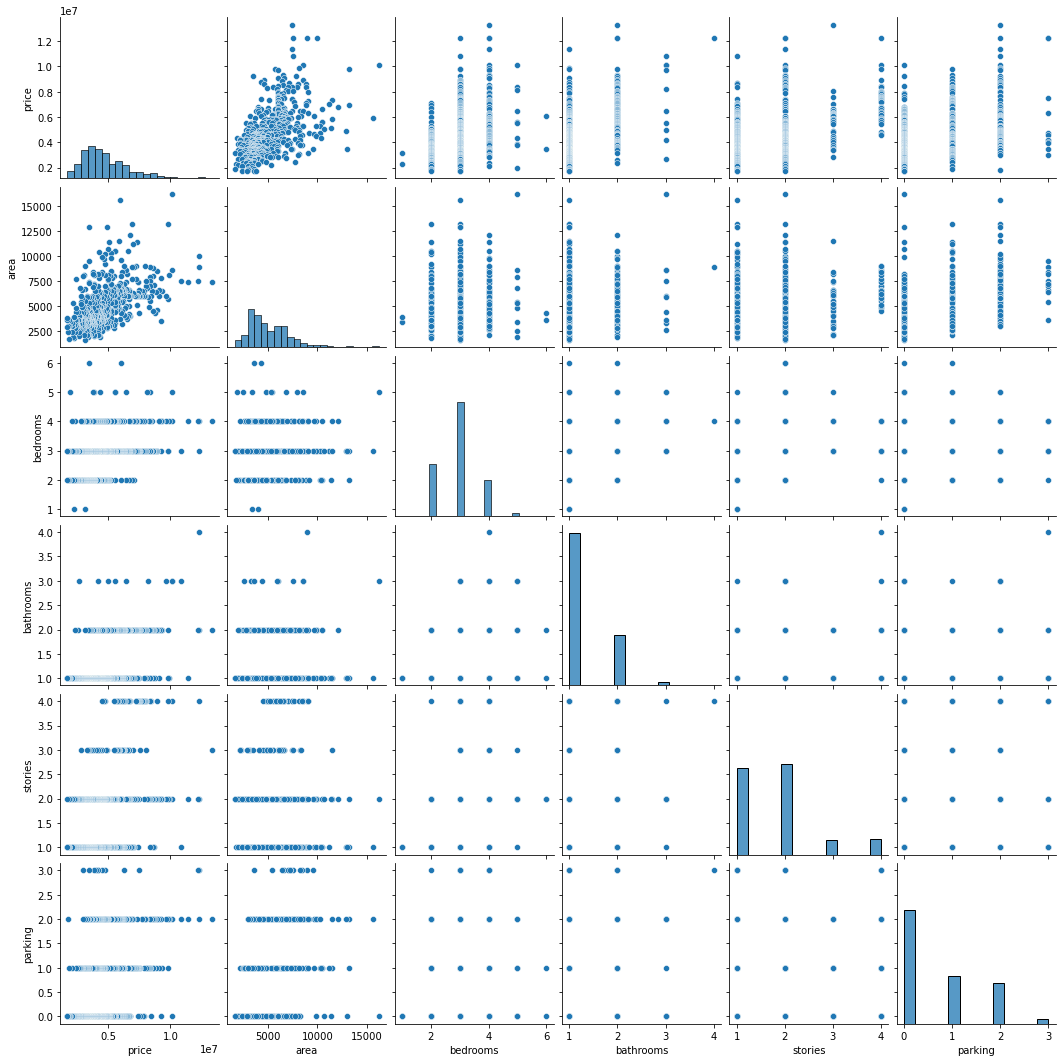

In [7]:
# Viualising the numerical variables
sns.pairplot(housing)


<AxesSubplot:xlabel='prefarea', ylabel='price'>

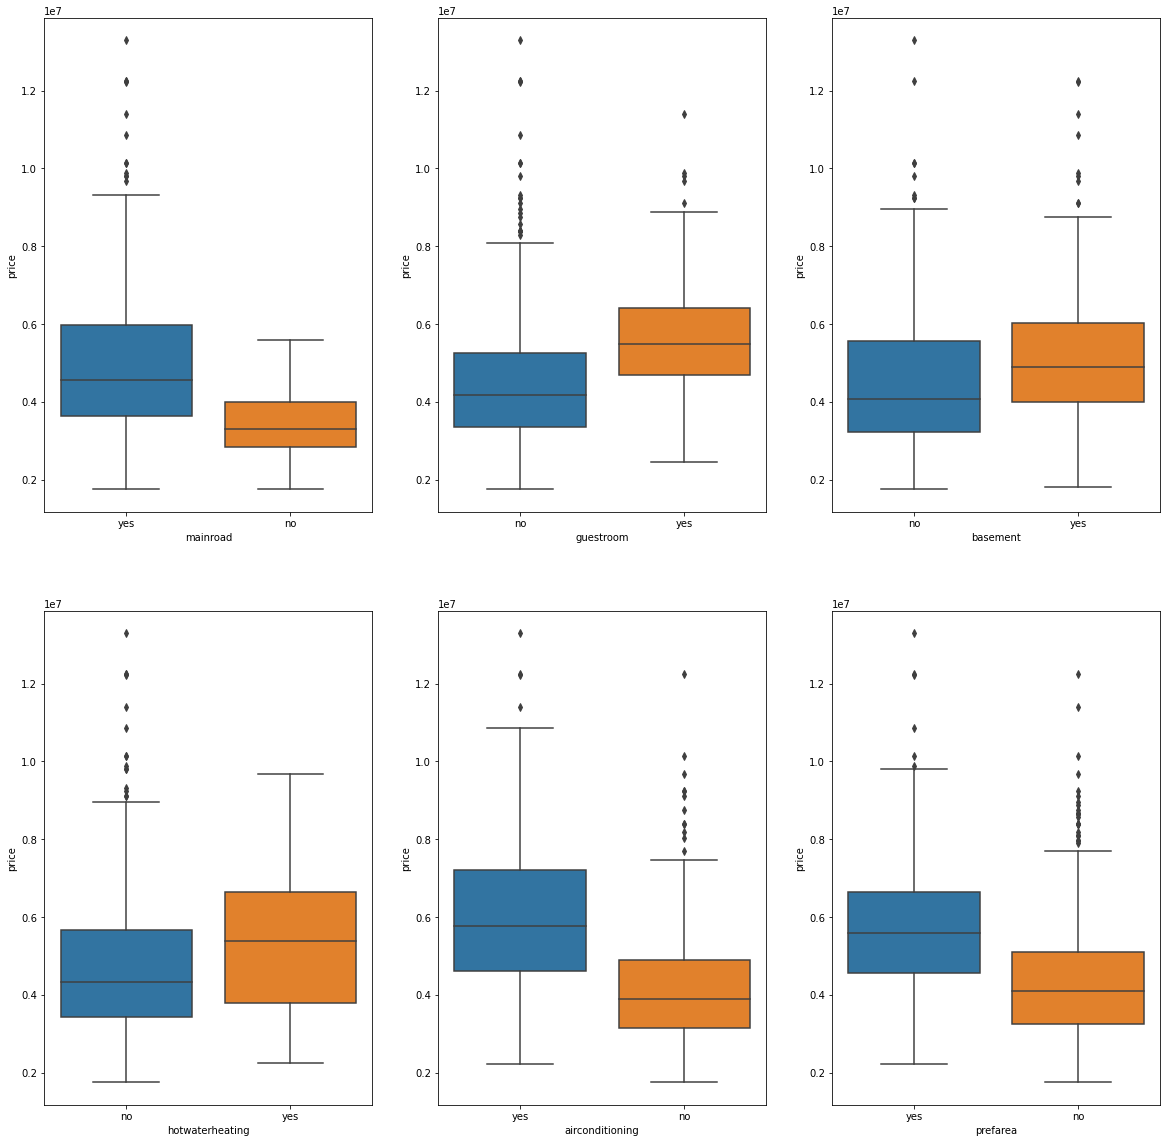

In [8]:
# Visualising the Categorical variables.

plt.figure(figsize=(20,20))
plt.subplot(2,3,1)
sns.boxplot(x='mainroad' , y='price', data=housing)

plt.subplot(2,3,2)
sns.boxplot(x='guestroom' , y='price', data=housing)

plt.subplot(2,3,3)
sns.boxplot(x='basement' , y='price', data=housing)

plt.subplot(2,3,4)
sns.boxplot(x='hotwaterheating' , y='price', data=housing)

plt.subplot(2,3,5)
sns.boxplot(x='airconditioning' , y='price', data=housing)

plt.subplot(2,3,6)
sns.boxplot(x='prefarea' , y='price', data=housing)


<AxesSubplot:xlabel='furnishingstatus', ylabel='price'>

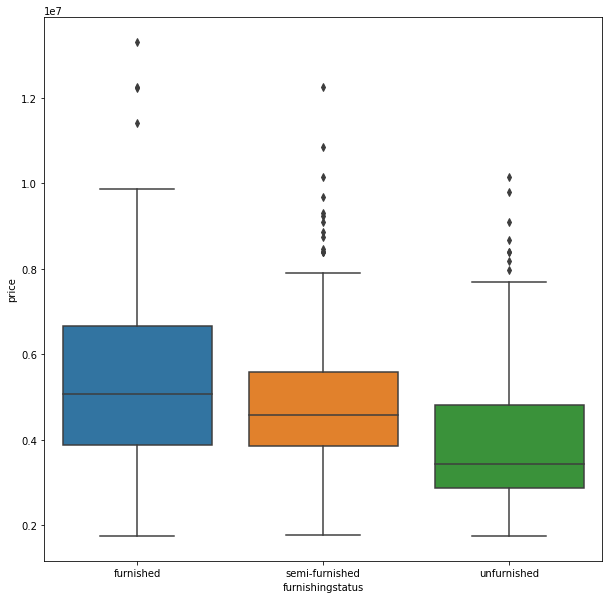

In [9]:
plt.figure(figsize=(10,10))
sns.boxplot(x='furnishingstatus',y='price',data=housing)

#### Therefore we have some variables which show linear relationship with the target variable (Price) therefore we can use Mutiple Linear regression in this model

# Preparing the Data for Modelling

### 1) Dealing with categorical variables

In [10]:
# Mapping all the "Yes" to "1"  and allo the "No"  to "0"
varlist=["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"]
housing[varlist]=housing[varlist].apply(lambda x:x.map({'yes':1,'no':0}))
housing.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


### 2) Creation of Dummy variables 

In [11]:
dummy=pd.get_dummies(housing["furnishingstatus"],drop_first=True)
dummy

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
540,0,1
541,1,0
542,0,1
543,0,0


In [12]:
# Concatinating of the dummy with the housing data set 
housing=pd.concat([housing,dummy],axis=1)

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [13]:
housing.drop('furnishingstatus',axis=1,inplace=True)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


### 3) Splitting the data set

In [14]:
df_train,df_test=train_test_split(housing,train_size=0.7,random_state= 100)

In [15]:
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,4403000,2880,3,1,2,1,0,0,0,0,0,1,1,0
54,7350000,6000,3,2,2,1,1,0,0,1,1,0,1,0
171,5250000,10269,3,1,1,1,0,0,0,0,1,1,1,0
244,4550000,5320,3,1,2,1,1,1,0,0,0,1,1,0
268,4382000,4950,4,1,2,1,0,0,0,1,0,0,1,0


In [16]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,3710000,3600,3,1,1,1,0,0,0,0,1,0,0,1
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0
159,5460000,3150,3,2,1,1,1,1,0,1,0,0,0,0
35,8080940,7000,3,2,4,1,0,0,0,1,2,0,0,0
28,8400000,7950,5,2,2,1,0,1,1,0,2,0,0,1


###  4) Scaling of the Variables 

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler=MinMaxScaler()

In [19]:
# Applying minmax scaler to the columns except with the ones with 0 and 1
mlist=["price","area","bedrooms","bathrooms","stories","parking"]
df_train[mlist]=scaler.fit_transform(df_train[mlist])
df_test[mlist]=scaler.transform(df_test[mlist])


In [20]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [21]:
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.229697,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.484848,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.303030,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.242424,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.227879,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


<AxesSubplot:>

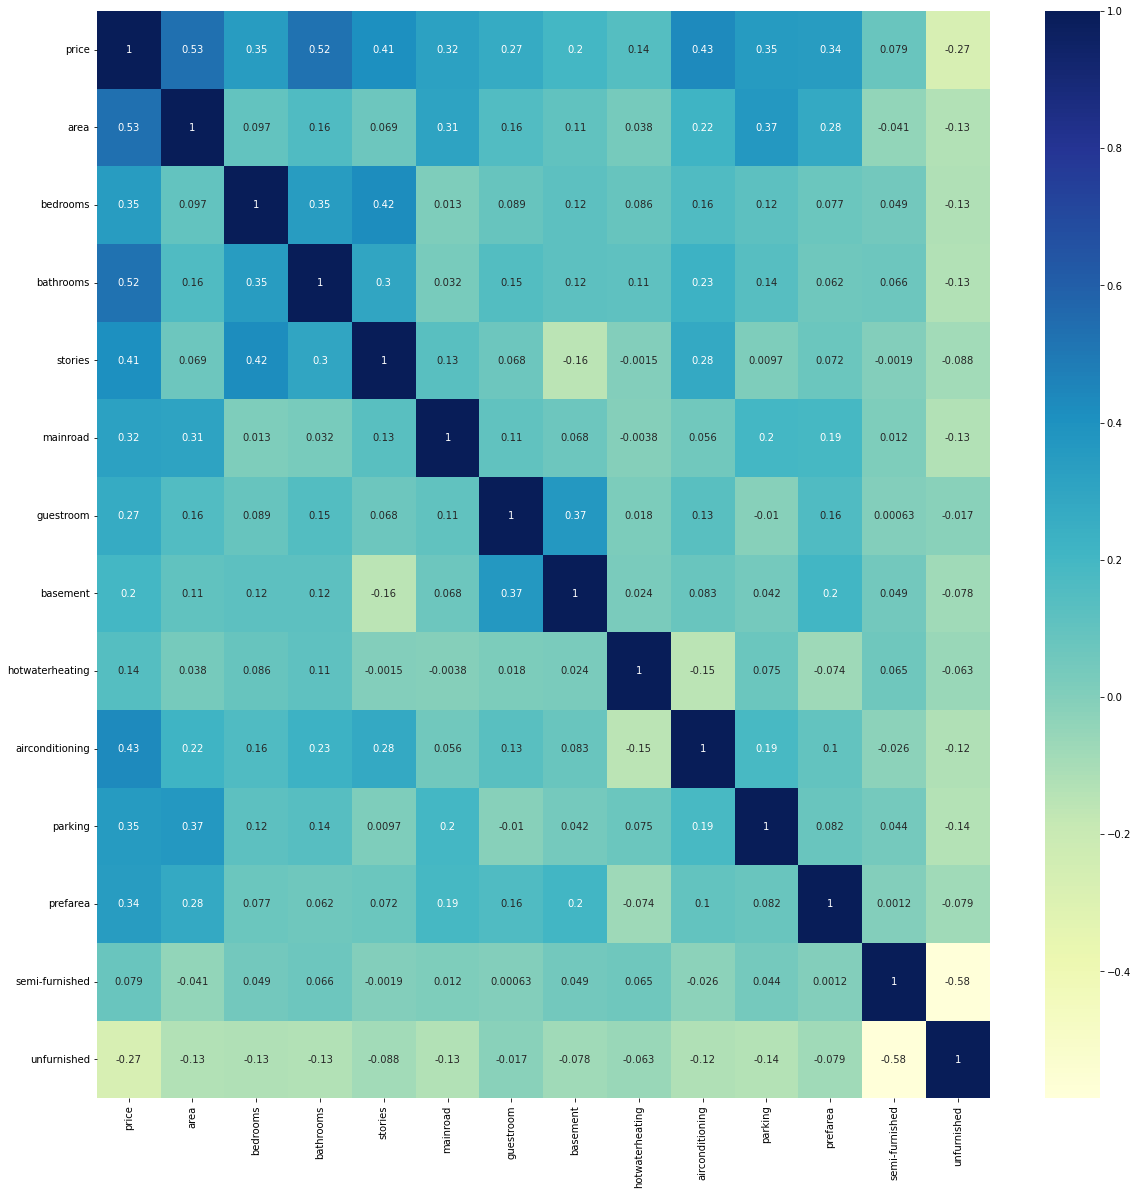

In [22]:
plt.figure(figsize=(20,20))
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")

# Data Modelling

In [23]:
# Splitting  the variables into X and Y
y_train=df_train["price"]
df_train.drop("price",axis=1,inplace=True)

In [24]:
df_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [25]:
y_train

359    0.169697
19     0.615152
159    0.321212
35     0.548133
28     0.575758
         ...   
526    0.048485
53     0.484848
350    0.175758
79     0.424242
520    0.060606
Name: price, Length: 381, dtype: float64

In [26]:
X_train=df_train

In [27]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [28]:
# Selecting the appropriate number of variables using RFE technique

In [29]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [30]:
lm=LinearRegression()

In [31]:
lm.fit(X_train,y_train)

LinearRegression()

In [32]:
rfe = RFE(lm,n_features_to_select=10)         # running RFE
rfe=rfe.fit(X_train,y_train)


In [33]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', False, 3),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 4),
 ('unfurnished', False, 2)]

In [34]:
col=X_train.columns[rfe.support_]
col

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea'],
      dtype='object')

In [35]:
X_train.columns[~rfe.support_]

Index(['basement', 'semi-furnished', 'unfurnished'], dtype='object')

# Detailed model using stats model Library

In [36]:
X_train_rfe=X_train[col]
X_train_rfe

,area,bedrooms,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,parking,prefarea
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0.333333,0
19,0.403379,0.4,0.5,0.333333,1,0,0,1,0.333333,1
159,0.115628,0.4,0.5,0.000000,1,1,0,1,0.000000,0
35,0.454417,0.4,0.5,1.000000,1,0,0,1,0.666667,0
28,0.538015,0.8,0.5,0.333333,1,0,1,0,0.666667,0
...,...,...,...,...,...,...,...,...,...,...
526,0.118268,0.2,0.0,0.000000,1,0,0,0,0.000000,0
53,0.291623,0.4,0.5,1.000000,1,0,0,1,0.666667,0
350,0.139388,0.2,0.0,0.333333,1,0,1,0,0.333333,0
79,0.366420,0.4,0.5,0.666667,1,1,0,1,0.000000,0


In [37]:
X_train_rfelm=sm.add_constant(X_train_rfe)

In [38]:
lr1=sm.OLS(y_train,X_train_rfelm).fit()

In [39]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     74.89
Date:                Fri, 20 Jan 2023   Prob (F-statistic):           1.28e-82
Time:                        13:58:59   Log-Likelihood:                 374.65
No. Observations:                 381   AIC:                            -727.3
Df Residuals:                     370   BIC:                            -683.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0027      0.018      0.151      0.880      -0.033       0.038
area                0.2363      0.030      7.787      0.000       0.177       0.296
bedrooms            0.0661      0.037      1.794      0.074      -0.006       0.139
bathrooms           0.1982      0.022      8.927      0.000       0.155       0.242
stories             0.0977      0.019      5.251      0.000       0.061       0.134
mainroad            0.0556      0.014      3.848      0.000       0.027       0.084
guestroom           0.0381      0.013      2.934      0.004       0.013       0.064
hotwaterheating     0.0897      0.022      4.104      0.000       0.047       0.133
airconditioning     0.0711      0.011      6.235      0.000       0.049       0.093
parking             0.0637      0.018      3.488      0.001       0.028       0.100
prefarea            0.0643      0.012      5.445      0.000       0.041       0.088
==============================================================================
Omnibus:                       86.105   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.069
Skew:                           0.992   Prob(JB):                     7.60e-63
Kurtosis:                       6.753   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating the VIF
vif=pd.DataFrame()

In [41]:
vif["Features"]=X_train_rfe.columns
vif["VIF"]=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1]) ]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values("VIF",ascending = False)
vif

,Features,VIF
1,bedrooms,5.85
4,mainroad,5.53
0,area,4.66
3,stories,2.45
8,parking,2.11
7,airconditioning,1.75
2,bathrooms,1.64
9,prefarea,1.47
5,guestroom,1.30
6,hotwaterheating,1.13


In [42]:
# Removing the Bedrooms for the data frame
X=X_train_rfe.pop("bedrooms")

In [43]:
X_train_rfe

,area,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,parking,prefarea
359,0.155227,0.0,0.000000,1,0,0,0,0.333333,0
19,0.403379,0.5,0.333333,1,0,0,1,0.333333,1
159,0.115628,0.5,0.000000,1,1,0,1,0.000000,0
35,0.454417,0.5,1.000000,1,0,0,1,0.666667,0
28,0.538015,0.5,0.333333,1,0,1,0,0.666667,0
...,...,...,...,...,...,...,...,...,...
526,0.118268,0.0,0.000000,1,0,0,0,0.000000,0
53,0.291623,0.5,1.000000,1,0,0,1,0.666667,0
350,0.139388,0.0,0.333333,1,0,1,0,0.333333,0
79,0.366420,0.5,0.666667,1,1,0,1,0.000000,0


In [44]:
X_train_rfelm=sm.add_constant(X_train_rfe)
lr1=sm.OLS(y_train,X_train_rfelm).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     82.37
Date:                Fri, 20 Jan 2023   Prob (F-statistic):           6.67e-83
Time:                        13:58:59   Log-Likelihood:                 373.00
No. Observations:                 381   AIC:                            -726.0
Df Residuals:                     371   BIC:                            -686.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0242      0.013      1.794      0.074      -0.002       0.051
area                0.2367      0.030      7.779      0.000       0.177       0.297
bathrooms           0.2070      0.022      9.537      0.000       0.164       0.250
stories             0.1096      0.017      6.280      0.000       0.075       0.144
mainroad            0.0536      0.014      3.710      0.000       0.025       0.082
guestroom           0.0390      0.013      2.991      0.003       0.013       0.065
hotwaterheating     0.0921      0.022      4.213      0.000       0.049       0.135
airconditioning     0.0710      0.011      6.212      0.000       0.049       0.094
parking             0.0669      0.018      3.665      0.000       0.031       0.103
prefarea            0.0653      0.012      5.513      0.000       0.042       0.089
==============================================================================
Omnibus:                       91.542   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              315.402
Skew:                           1.044   Prob(JB):                     3.25e-69
Kurtosis:                       6.938   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
vif=pd.DataFrame()
vif["Features"]=X_train_rfe.columns
vif["VIF"]=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1]) ]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values("VIF",ascending = False)
vif

,Features,VIF
0,area,4.52
3,mainroad,4.26
2,stories,2.12
7,parking,2.10
6,airconditioning,1.75
1,bathrooms,1.58
8,prefarea,1.47
4,guestroom,1.30
5,hotwaterheating,1.12


In [46]:
y_train_pred=lr1.predict(X_train_rfelm)


# Residual analysis


Text(0.5, 0, 'Errors')

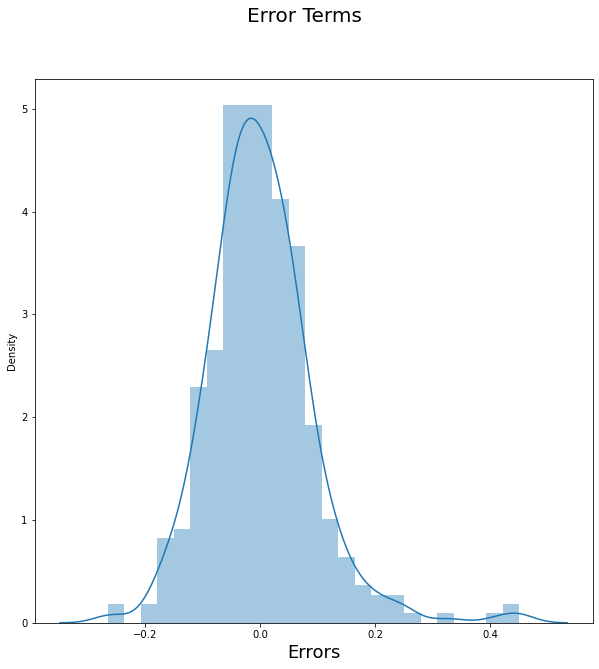

In [47]:
res=y_train-y_train_pred
fig=plt.figure(figsize=(10,10))
sns.distplot(res)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# Model prediction

In [48]:
# Spliting the test data set into X and y
y_test=df_test.pop("price")
X=df_test.drop(["semi-furnished","unfurnished","basement","bedrooms"],axis=1,inplace=True)
X_test=df_test
X_test.head()

,area,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,parking,prefarea
265,0.091869,0.0,0.333333,1,0,0,0,0.000000,1
54,0.366420,0.5,0.333333,1,1,0,1,0.333333,0
171,0.742080,0.0,0.000000,1,0,0,0,0.333333,1
244,0.306582,0.0,0.333333,1,1,0,0,0.000000,1
268,0.274023,0.0,0.333333,1,0,0,1,0.000000,0


In [49]:
# Predicting the model
X_test_lm=sm.add_constant(X_test)
y_test_pred=lr1.predict(X_test_lm)

In [50]:
r2=r2_score(y_true=y_test,y_pred=y_test_pred)
print(r2)

0.6481740917926483


# Prediction Using Decison Trees

In [51]:
from sklearn.tree import DecisionTreeRegressor

In [52]:
dt_reg=DecisionTreeRegressor(random_state=100, max_depth=4, min_samples_leaf=10)

In [53]:
np.random.seed(0)
df_train1,df_test1=train_test_split(housing,train_size=0.7,random_state= 100)

In [54]:
df_train1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,3710000,3600,3,1,1,1,0,0,0,0,1,0,0,1
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0
159,5460000,3150,3,2,1,1,1,1,0,1,0,0,0,0
35,8080940,7000,3,2,4,1,0,0,0,1,2,0,0,0
28,8400000,7950,5,2,2,1,0,1,1,0,2,0,0,1


In [55]:
df_test1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,4403000,2880,3,1,2,1,0,0,0,0,0,1,1,0
54,7350000,6000,3,2,2,1,1,0,0,1,1,0,1,0
171,5250000,10269,3,1,1,1,0,0,0,0,1,1,1,0
244,4550000,5320,3,1,2,1,1,1,0,0,0,1,1,0
268,4382000,4950,4,1,2,1,0,0,0,1,0,0,1,0


In [56]:
scaler1=MinMaxScaler()

In [57]:
df_train1["price"]=scaler1.fit_transform(df_train1[["price"]])

In [58]:
df_test1["price"]=scaler1.transform(df_test1[["price"]])

In [59]:
y_train1=df_train1.pop("price")
X_train1=df_train1

In [60]:
X_train1.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,3600,3,1,1,1,0,0,0,0,1,0,0,1
19,6420,3,2,2,1,0,0,0,1,1,1,1,0
159,3150,3,2,1,1,1,1,0,1,0,0,0,0
35,7000,3,2,4,1,0,0,0,1,2,0,0,0
28,7950,5,2,2,1,0,1,1,0,2,0,0,1


In [61]:
y_test1=df_test1.pop("price")
X_test1=df_test1

In [62]:
X_test1.shape ,X_train1.shape

((164, 13), (381, 13))

In [63]:
# Fitting the model on Decision Trees
dt_reg.fit(X_train1,y_train1)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, random_state=100)

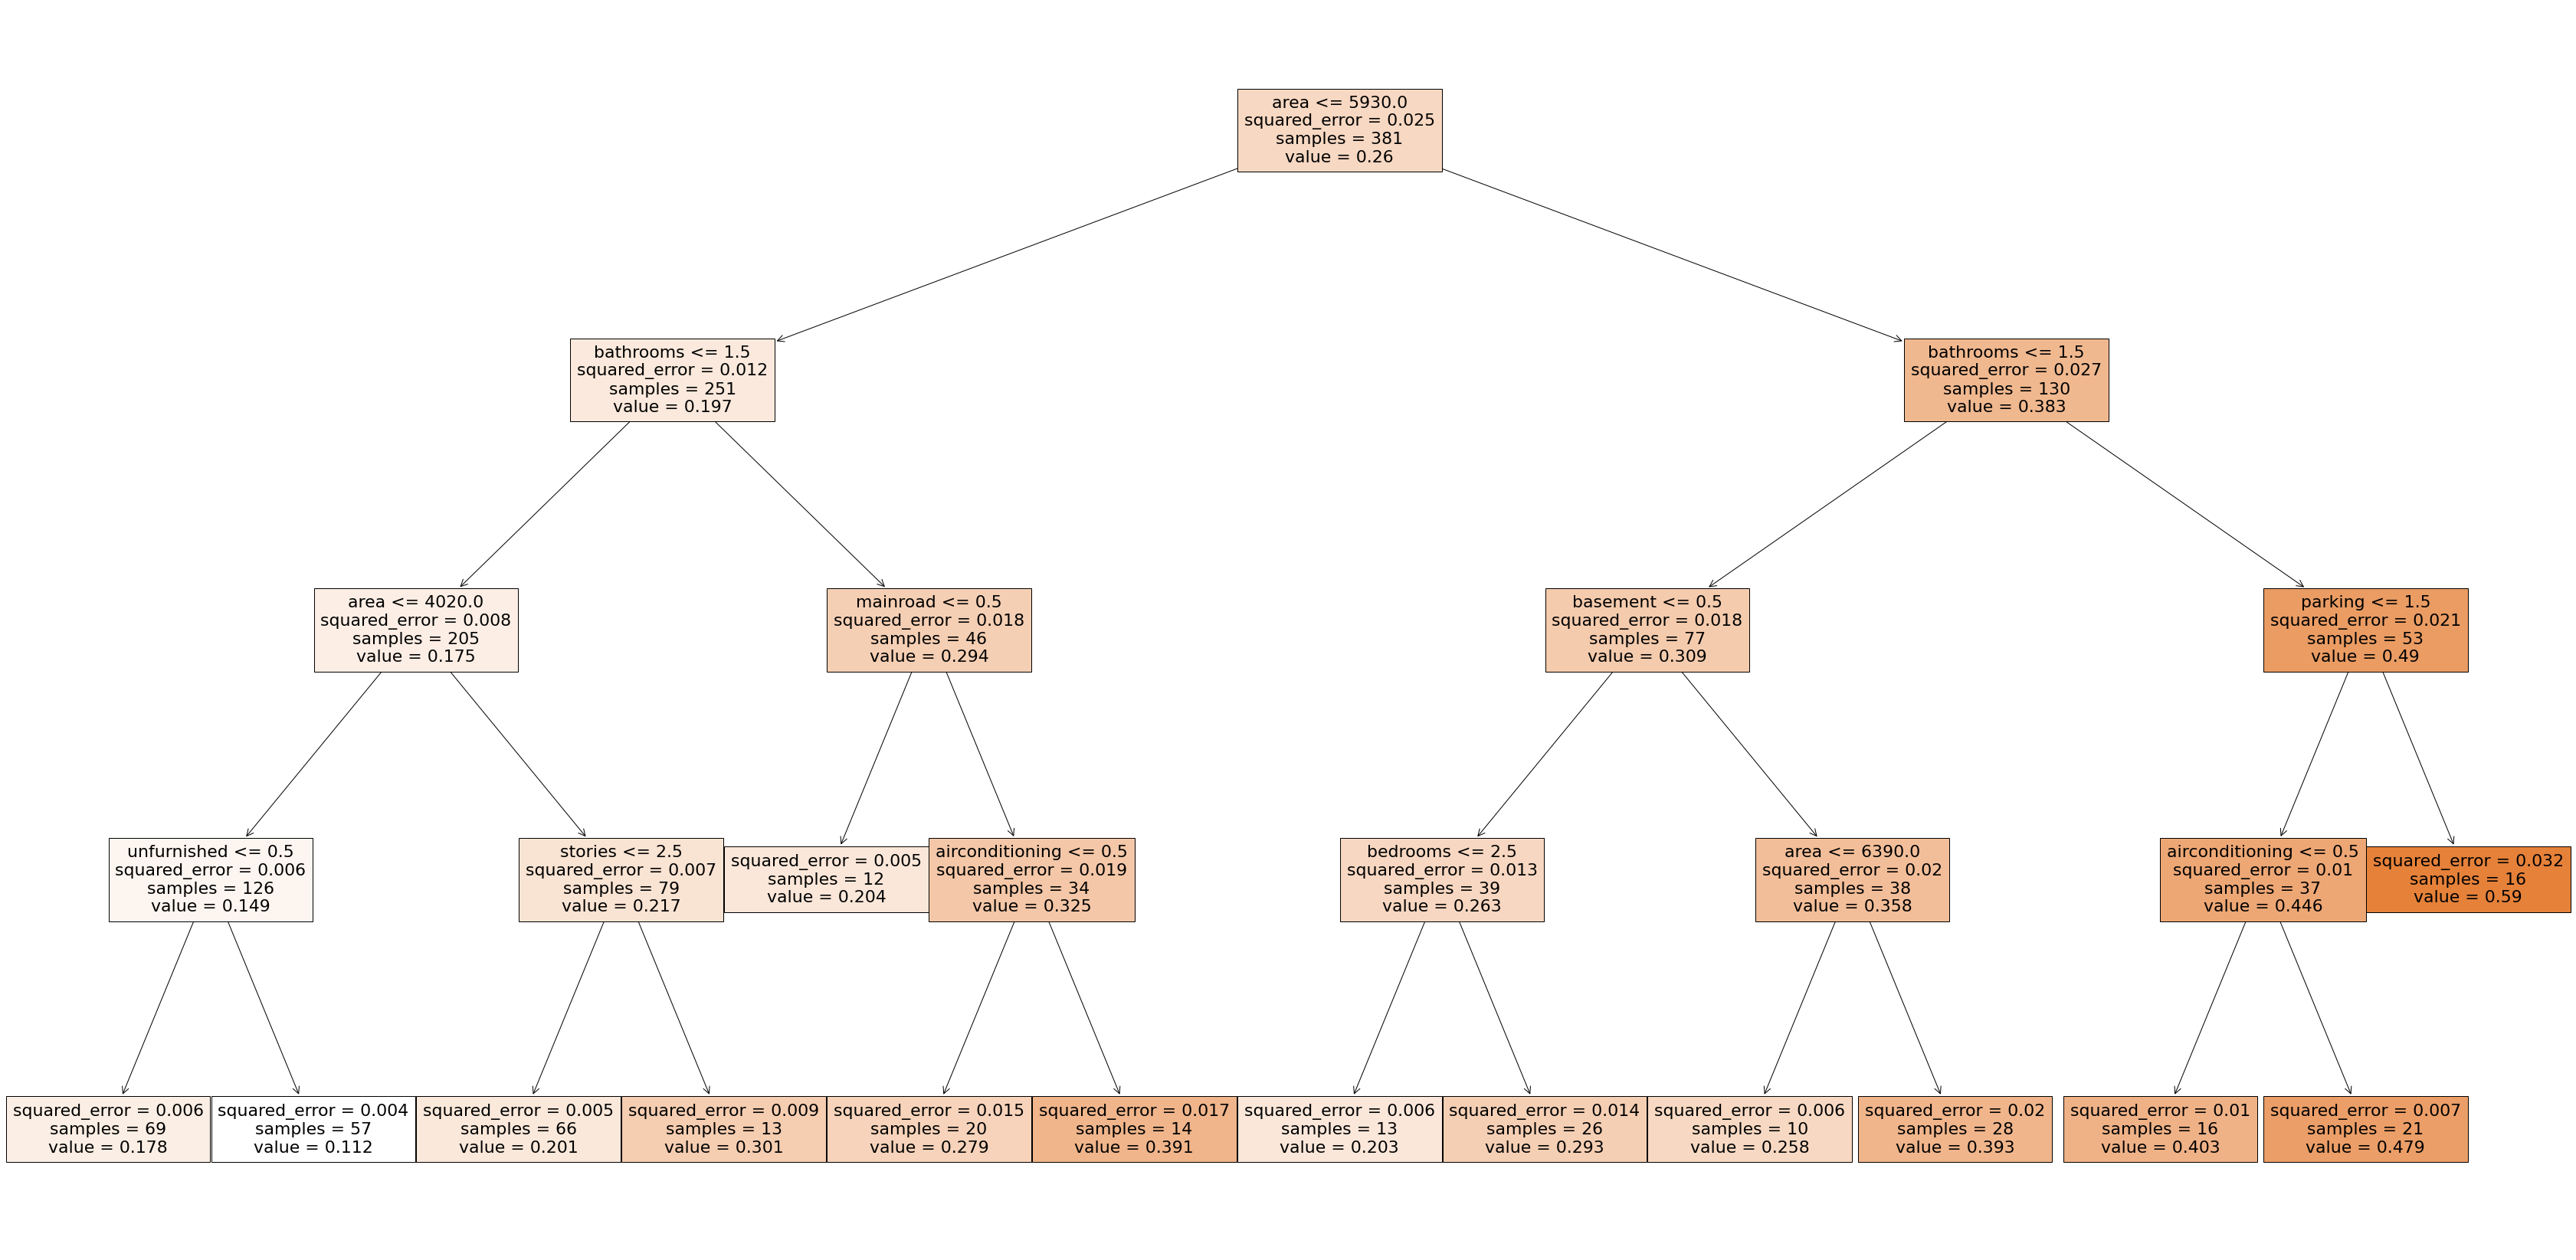

In [64]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(dt_reg, feature_names = X_train1.columns,filled=True);

In [65]:
y_test_pred1=dt_reg.predict(X_test1)


In [66]:
y_train_pred1=dt_reg.predict(X_train1)

In [67]:
r2_train=r2_score(y_true=y_train1,y_pred=y_train_pred1)
print("R2 score on the train set is " + str(r2_train))

R2 score on the train set is 0.6234560022579934


In [68]:
r2_test=r2_score(y_true=y_test1,y_pred=y_test_pred1)
print("R2 score on the train set is " + str(r2_test))

R2 score on the train set is 0.5289772624972271


# Hyper Parameter Tuning

In [69]:
dt=DecisionTreeRegressor(random_state=100)

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
params={'max_depth':[2,3,4,5,6],
        'min_samples_leaf':[5,10,20,30,100],
        'min_samples_split':[5,10,20,30,100]}

In [72]:
grid_cv=GridSearchCV(estimator=dt,param_grid=params,cv=4,n_jobs=-1,verbose=1,scoring="r2")

In [73]:
%%time
grid_cv.fit(X_train1,y_train1)

Fitting 4 folds for each of 125 candidates, totalling 500 fits
CPU times: total: 375 ms
Wall time: 7.33 s


GridSearchCV(cv=4, estimator=DecisionTreeRegressor(random_state=100), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [5, 10, 20, 30, 100],
                         'min_samples_split': [5, 10, 20, 30, 100]},
             scoring='r2', verbose=1)

In [74]:
grid_cv.best_score_

0.4890644601992069

In [75]:
grid_cv.best_estimator_

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, min_samples_split=5,
                      random_state=100)

In [76]:
dt_best=grid_cv.best_estimator_

In [77]:
dt_best.fit(X_train1,y_train1)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, min_samples_split=5,
                      random_state=100)

In [78]:
y_train_pred2=dt_best.predict(X_train1)

In [79]:
r2_score(y_train1,y_train_pred2)

0.6658076427979378

In [80]:
y_test_pred2=dt_best.predict(X_test1)

In [81]:
r2_score(y_test1,y_test_pred2)

0.5306930269056952

# Random Forest

In [82]:
from sklearn.ensemble import RandomForestRegressor

In [98]:
rt=RandomForestRegressor(max_depth=5,random_state=100,min_samples_leaf=10,n_estimators=20)

In [99]:
rt.fit(X_train1,y_train1)

RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_estimators=20,
                      random_state=100)

In [101]:
sample_tree=rt.estimators_[3]

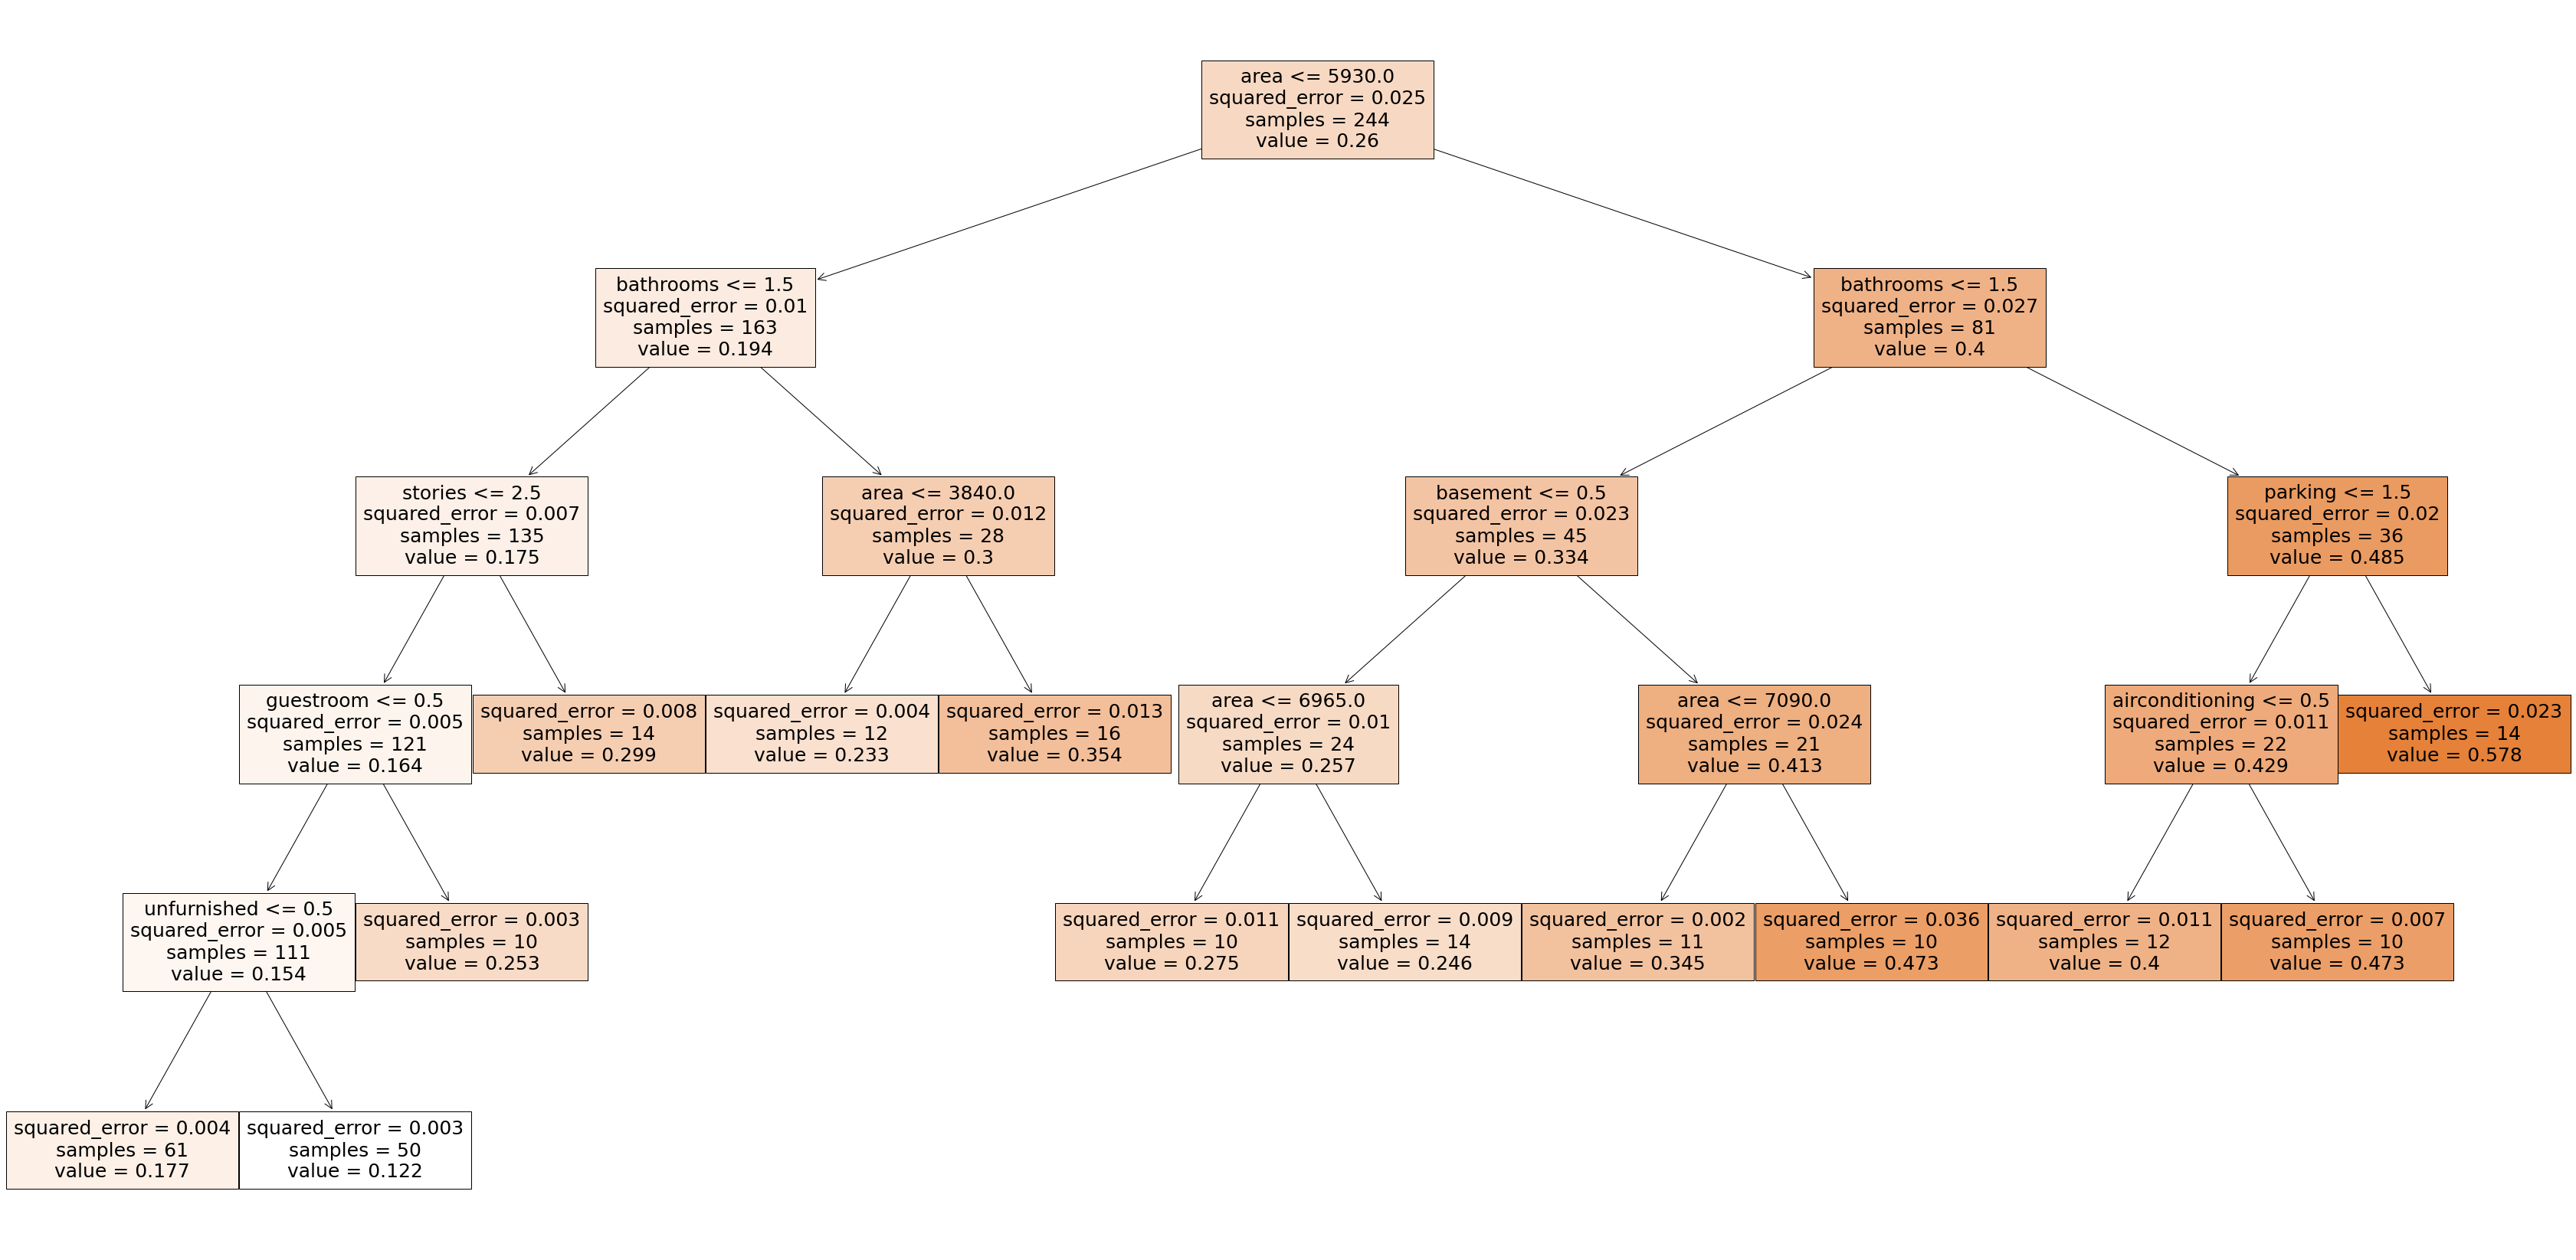

In [102]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(sample_tree, feature_names = X_train1.columns,filled=True);

In [103]:
y_test_pred3=rt.predict(X_test1)
y_train_pred3=rt.predict(X_train1)

In [104]:
r2_score(y_test1,y_test_pred3)

0.5810205094021307

In [105]:
r2_score(y_train1,y_train_pred3)

0.6706636031880229

In [108]:
imp_df=pd.DataFrame({"Varlist":X_train1.columns,"Importance": rt.feature_importances_})

In [109]:
imp_df.sort_values(by="Importance",ascending=False)

,Varlist,Importance
0,area,0.561970
2,bathrooms,0.218762
9,parking,0.038575
12,unfurnished,0.037024
8,airconditioning,0.036422
3,stories,0.027883
10,prefarea,0.026357
6,basement,0.024777
1,bedrooms,0.012165
5,guestroom,0.007489
